In [82]:
import pandas as pd
import xgboost as xgb
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [83]:
data_path='./data1.xlsx'
data = pd.read_excel(data_path)
data['性别'] = data['性别'].apply(lambda x:1 if x == '男'  else 0)
data['获奖情况'] = data['获奖情况'].apply(lambda x: 1 if x == '校级奖学金' else (2 if x == '国家奖学金' else (3 if x == '社会奖学金' else 0)))
data.head()


,Unnamed: 0,性别,专业,考试学年,智育成绩,是否参与本学年评奖,体测总分,借书总数,论文数量,思想成长,...,三好学生,文体积极分子,学生组织优秀个人,学习进步奖,优秀团干部,优秀团员,优秀学生干部奖,“双培计划”学习进步奖,“双培计划”优秀学生干部,获奖情况
0,0,0,26,1,87.6327,1,72.15,4.0,0,18,...,1,0,0,0,0,0,0,0,0,1
1,1,0,26,2,89.9434,1,70.50,3.0,0,18,...,1,0,0,0,0,0,0,0,0,1
2,2,0,26,3,88.4667,1,NaN,NaN,0,18,...,1,0,0,0,0,0,0,0,0,1
3,3,1,52,2,86.3803,1,76.40,NaN,0,6,...,1,0,0,0,0,0,0,0,0,1
4,4,1,52,3,87.5455,1,NaN,5.0,0,6,...,1,0,0,0,0,0,0,0,0,1


In [84]:
X=data.iloc[:,1:25]
Y=data.iloc[:,25]

In [85]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: 获奖情况, dtype: int64

In [86]:
X.head()

,性别,专业,考试学年,智育成绩,是否参与本学年评奖,体测总分,借书总数,论文数量,思想成长,实践实习,...,青学之星,三好学生,文体积极分子,学生组织优秀个人,学习进步奖,优秀团干部,优秀团员,优秀学生干部奖,“双培计划”学习进步奖,“双培计划”优秀学生干部
0,0,26,1,87.6327,1,72.15,4.0,0,18,1,...,0,1,0,0,0,0,0,0,0,0
1,0,26,2,89.9434,1,70.50,3.0,0,18,1,...,0,1,0,0,0,0,0,0,0,0
2,0,26,3,88.4667,1,NaN,NaN,0,18,1,...,0,1,0,0,0,0,0,0,0,0
3,1,52,2,86.3803,1,76.40,NaN,0,6,2,...,0,1,0,0,0,0,0,0,0,0
4,1,52,3,87.5455,1,NaN,5.0,0,6,2,...,0,1,0,0,0,0,0,0,0,0


In [87]:
X = X.drop('“双培计划”学习进步奖', axis=1)
X = X.drop('青学之星', axis=1)
X = X.drop('“双培计划”优秀学生干部', axis=1)
X = X.apply(lambda x: x.fillna(x.mean()),axis=0)

In [88]:
X.head()

,性别,专业,考试学年,智育成绩,是否参与本学年评奖,体测总分,借书总数,论文数量,思想成长,实践实习,...,学术创新,文化活动,体育活动评价成绩,三好学生,文体积极分子,学生组织优秀个人,学习进步奖,优秀团干部,优秀团员,优秀学生干部奖
0,0,26,1,87.6327,1,72.150000,4.000000,0,18,1,...,2,0,0,1,0,0,0,0,0,0
1,0,26,2,89.9434,1,70.500000,3.000000,0,18,1,...,2,0,0,1,0,0,0,0,0,0
2,0,26,3,88.4667,1,71.259305,9.723596,0,18,1,...,2,0,0,1,0,0,0,0,0,0
3,1,52,2,86.3803,1,76.400000,9.723596,0,6,2,...,1,0,5,1,0,0,0,0,0,0
4,1,52,3,87.5455,1,71.259305,5.000000,0,6,2,...,1,0,5,1,0,0,0,0,0,0


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)

In [90]:
xgb_train=xgb.DMatrix(X_train,label=y_train)
xgb_test=xgb.DMatrix(X_test,label=y_test)

In [91]:
params={
    'objective':'multi:softmax',
    'eta':0.1,
    'max_depth':7,
    'n_estimators':500,
    'num_class':4,
    'alpha': 0.6,
    'lambda': 1.4,
    'colsample_bytree':0.97,
    'min_child_weight':0.5,
    'gamma':0.015,
}

watchlist=[(xgb_train,'train'),(xgb_test,'test')]
# 设置训练轮次
num_round=100
bst=xgb.train(params,xgb_train,num_round,watchlist)

[14:59:05] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[0]	train-mlogloss:1.27040	test-mlogloss:1.27186
[1]	train-mlogloss:1.16603	test-mlogloss:1.16960
[2]	train-mlogloss:1.07859	test-mlogloss:1.08416
[3]	train-mlogloss:1.00402	test-mlogloss:1.01152
[4]	train-mlogloss:0.93963	test-mlogloss:0.94951
[5]	train-mlogloss:0.88353	test-mlogloss:0.89538
[6]	train-mlogloss:0.83425	test-mlogloss:0.84806
[7]	train-mlogloss:0.79011	test-mlogloss:0.80648
[8]	train-mlogloss:0.75150	test-mlogloss:0.77017
[9]	train-mlogloss:0.71735	test-mlogloss:0.73800
[10]	train-mlogloss:0.68630	test-mlogloss:0.70935
[11]	train-mlogloss:0.65866	test-mlogloss:0.68408
[12]	train-mlogloss:0.63493	test-mlogloss:0.66215
[13]	train-mlogloss:0.61231	test-mlogloss:0.64150
[14]	train-mlogloss:0.59192	test-mlogloss:0.62365
[15]	train-mlogloss:0.57342	test-mlogloss:0.60742
[16]	train-mlogloss:0.55678	test-mlogloss:0.59278
[17]	train-mlogloss:0.54165	test-mlogloss:0.57976
[18]	train-mlogloss:

In [92]:
pred=bst.predict(xgb_test)
print(pred)

[1. 0. 1. ... 1. 1. 1.]


In [93]:
#模型评估

# error_rate=np.sum(pred!=test.lable)/test.lable.shape[0]
error_rate=np.sum(pred!=y_test)/y_test.shape[0]

print('测试集错误率(softmax):{}'.format(error_rate))

accuray=1-error_rate
print('测试集准确率：%.4f' %accuray)

测试集错误率(softmax):0.16263787843229288
测试集准确率：0.8374


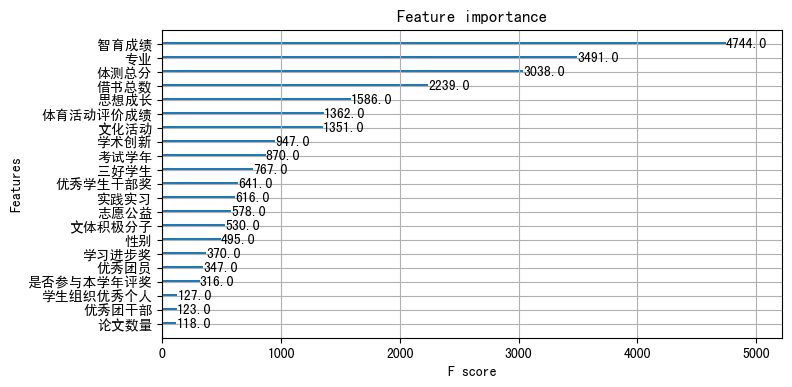

In [94]:
import matplotlib.pyplot as plt
# 中文乱码解决方法
plt.rcParams["font.sans-serif"] = ["SimHei"]
xgb.plot_importance(bst)
plt.rcParams['figure.figsize'] = [8, 4]
plt.show()